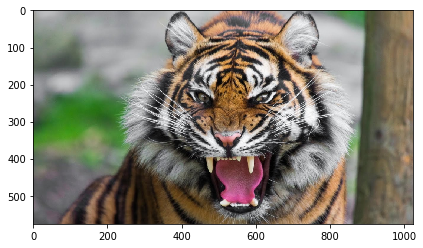

(589824, 3)
[[164 160 159]
 [164 162 160]
 [165 164 162]
 ...
 [119 115 106]
 [120 116 107]
 [122 118 109]]


In [1]:
#load image
import numpy as np
from skimage import io
tiger = io.imread("tiger.png")
io.imshow(tiger)
io.show()
print(tiger.shape)
a,b,c = tiger.shape

#reshaping image array from 3D to 2D for k-mean clustering algo
tiger = np.reshape(tiger,(a * b,c))
print(tiger.shape)
print(tiger)


In [13]:
# Fitting Model on loaded image
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=64,random_state=0).fit(tiger)
print(kmeans.cluster_centers_)
print(kmeans.labels_)


[[203.97390406 204.27051934 205.44208079]
 [129.21311475  93.56404251  62.05602594]
 [128.79108705 132.72986256 130.21524365]
 [ 62.98718613  65.08117917  48.5630694 ]
 [174.95050271 176.1920437  177.11146558]
 [ 23.76133721  18.11155523  15.94949128]
 [119.45312147 103.63935537  81.89886287]
 [ 64.59597599 124.92081778  54.18059387]
 [156.97663874 160.16205027 159.27821587]
 [ 89.71843275  90.99308566  88.83273885]
 [166.08257865 132.56160629 101.90228789]
 [209.86934477 158.30947738 112.42765211]
 [ 89.42937269  83.95874539  67.91261993]
 [117.86760072 124.45163237 117.70067708]
 [226.57536467 225.57316508 225.91815235]
 [177.74524715  81.43060837 121.12642586]
 [100.03374814 101.49213909  98.23511036]
 [ 53.81815447  50.25073325  49.92735203]
 [218.27194492 172.23541786 133.69152802]
 [ 95.37062647  66.45775135  34.91605587]
 [148.85215139 152.28369807 151.03118723]
 [134.79104922 112.90341798  85.92277906]
 [ 98.68153637 133.87887494  99.08619386]
 [167.60960384 119.94645858  70.74

In [14]:
#saving compressed image and codebook(like a color pallete)
cluster_centroid = np.array(kmeans.cluster_centers_,dtype=np.uint8)
print(cluster_centroid)
labels = np.array(kmeans.labels_,dtype=np.uint8)
labels = np.reshape(labels,(a, b))
print(labels)
np.save("codebook.npy",cluster_centroid)
io.imsave("compressed_tiger.png",labels)

[[203 204 205]
 [129  93  62]
 [128 132 130]
 [ 62  65  48]
 [174 176 177]
 [ 23  18  15]
 [119 103  81]
 [ 64 124  54]
 [156 160 159]
 [ 89  90  88]
 [166 132 101]
 [209 158 112]
 [ 89  83  67]
 [117 124 117]
 [226 225 225]
 [177  81 121]
 [100 101  98]
 [ 53  50  49]
 [218 172 133]
 [ 95  66  34]
 [148 152 151]
 [134 112  85]
 [ 98 133  99]
 [167 119  70]
 [239 239 240]
 [205  92 149]
 [194 194 195]
 [ 68 143  33]
 [119  60  69]
 [ 43  28  17]
 [224 202 184]
 [ 10   8   7]
 [189 159 137]
 [ 49 122  31]
 [201 179 160]
 [105  92  74]
 [166 168 168]
 [ 58  40  28]
 [121 146  94]
 [145  69  95]
 [185 145 115]
 [150 101  47]
 [ 66  63  63]
 [ 50 104  42]
 [184 184 185]
 [139 143 140]
 [ 30  27  28]
 [ 77  78  76]
 [113  80  43]
 [ 78  51  29]
 [230 190 154]
 [192 141  88]
 [ 77 131  76]
 [ 77  75  57]
 [ 99  47  47]
 [109 110 109]
 [145 122  95]
 [135 124 112]
 [214 214 214]
 [122 113  99]
 [129 153 119]
 [ 99 144  68]
 [159 136 124]
 [ 41  38  39]]
[[ 8  8 36 ... 10 10 10]
 [ 8  8  8 ...

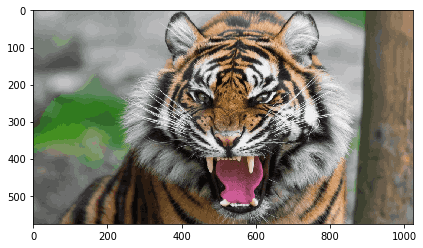

In [16]:
#decompress the compressed image 
compressed_tiger = io.imread("compressed_tiger.png")
codebook = np.load("codebook.npy")

decompressed_image = np.zeros((a,b,3),dtype= np.uint8)

for i in range(a):
    for j in range(b):
        decompressed_image[i,j,:] = codebook[compressed_tiger[i,j],:]

io.imshow(decompressed_image)
io.show()
io.imsave("decompressed_image.png",decompressed_image)

# now decompress image size on disk is also less than original image